# 1. Noice Search

In [1]:
import numpy as np
def smooth_signum(delta, eps = 0.2):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [4]:
from sklearn.preprocessing import MaxAbsScaler
def myscaler(X):
    return MaxAbsScaler().fit_transform(X)

In [5]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)

In [6]:
# Score Function
def d(x):
    return np.linalg.norm(x, 3)/x.shape[0]
def bcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    c_X = X.mean(axis = 0)
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += d(c_i - c_X)*X_i.shape[0]
    return s/(len(classes)*(X_i.shape[0]))
def wcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += sum([d(i-c_i) for i in X_i])/X_i.shape[0]
    return s
def balance(y):
    classes = [i for i in range(min(y), max(y)+1)]
    sizes = [len([j for j in y if j==i]) for i in classes]
    M = (max(sizes) - min(sizes))/len(y) * len(classes)
    return M
def SF(X,y):
    alpha = 0
    return 1 - 1/np.exp(np.exp(bcd(X,y) - wcd(X,y))) + alpha * np.exp(-balance(y))

In [8]:
from sklearn.decomposition import PCA
res = dict()
gen = range(1, 10)
init = 100
D = 10
delta_ = PCA(D).fit_transform(delta)

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
res_y  = list()
eps = np.linspace(2.5, 7.5, 1000)
for i in eps:
    y = DBSCAN(eps = i).fit_predict(delta_)
    res_y.append(y)

In [10]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['DBSCAM'] = cur_res

<IPython.core.display.Javascript object>


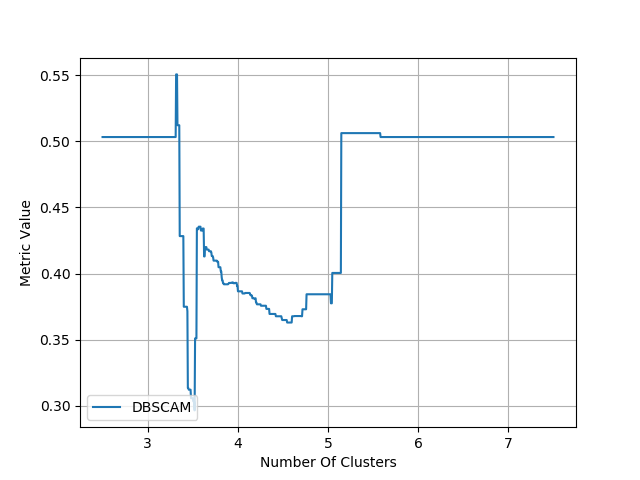

In [12]:
import matplotlib.pylab as plt
%matplotlib notebook
keys = res.keys()
for key in keys:
    plt.plot([i for i in eps], res[key])
plt.grid()
plt.legend(keys, loc='lower left')
plt.xlabel('Number Of Clusters')
plt.ylabel('Metric Value')
plt.savefig('Images/clusters_number.pdf')

# 2. Common Features Distribution

In [13]:
import numpy as np
def smooth_signum(delta, eps = 0.2):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [14]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta, eps = 0.2)
folder_results = 'DeltaMain'

In [15]:
_ = ['число знаков пунктуации / число слов',
     'тональность слов (по округленным значениям)',
     'Число отрицательных приставок и форм (не,ни,бес,без) / Число слов',
     'часть речи: частица',
      'сем. роль: каузатив',
     'словарь: инвективы',
     'сем. роль: ликвидатив',
     'доля местоимений 1 лица',
     'словарь: лексика сопротивления',
     'сем. роль: деструктив']
main_keys = [ind for ind,i in enumerate(keys) if keys[ind].lower() in _ or keys[ind] in _]

In [16]:
def f(delta_, delta, n = 21):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(-1, 1, n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
y = np.ones(delta_.shape[0])
classes = [1]
for y_ in classes:
    delta_1 = scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

0 Число знаков пунктуации / Число слов


<IPython.core.display.Javascript object>


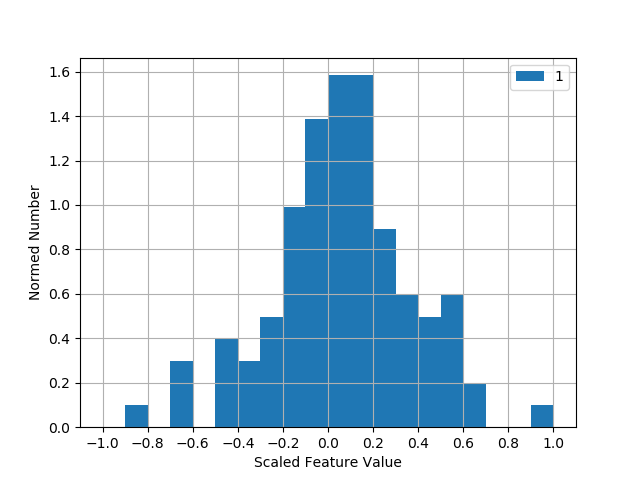

In [22]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Тональность слов (по округленным значениям)


<IPython.core.display.Javascript object>


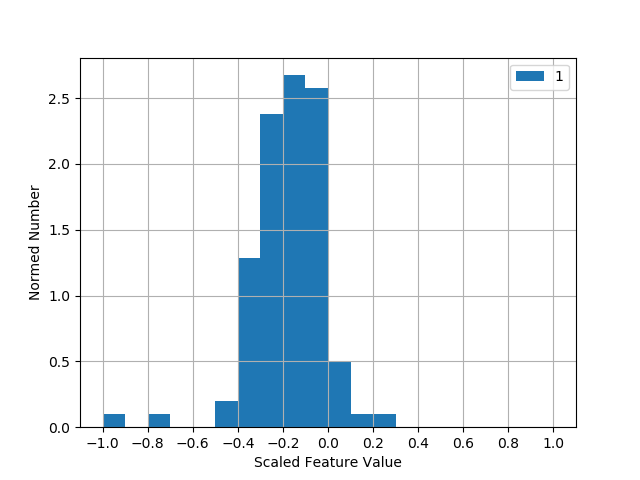

In [24]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

2 Число отрицательных приставок и форм (не,ни,бес,без) / Число слов


<IPython.core.display.Javascript object>


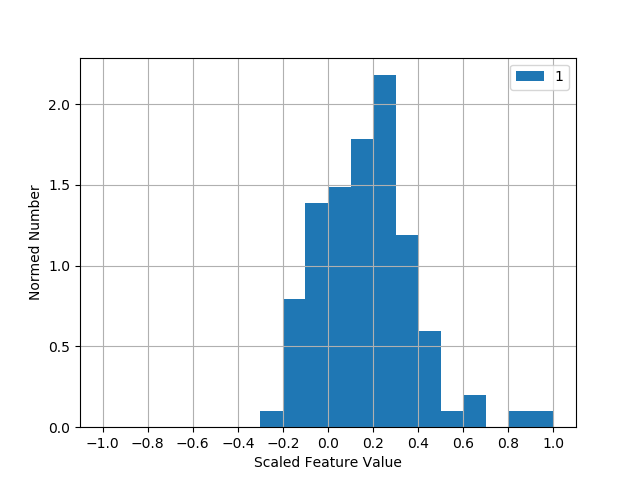

In [25]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

3 Доля местоимений 1 лица


<IPython.core.display.Javascript object>


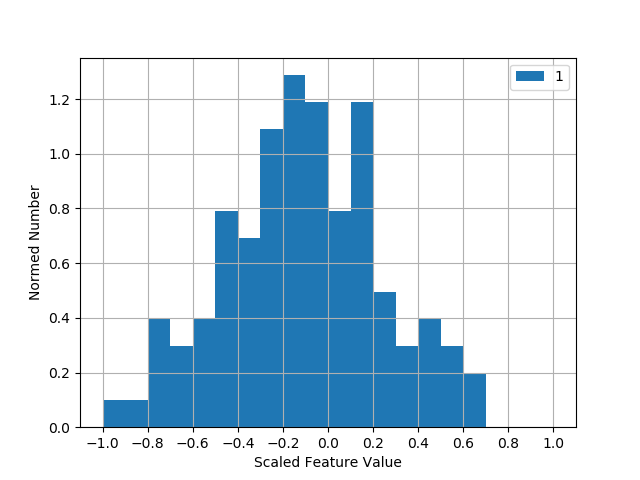

In [27]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

4 Словарь: Инвективы


<IPython.core.display.Javascript object>


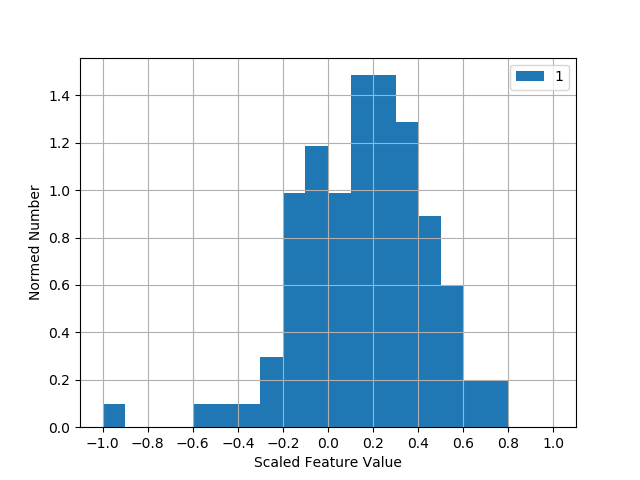

In [28]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

5 Словарь: Лексика сопротивления


<IPython.core.display.Javascript object>


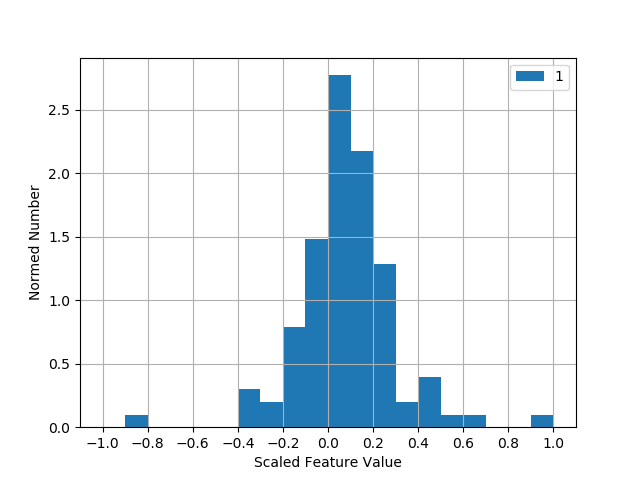

In [29]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

6 Часть речи: частица


<IPython.core.display.Javascript object>


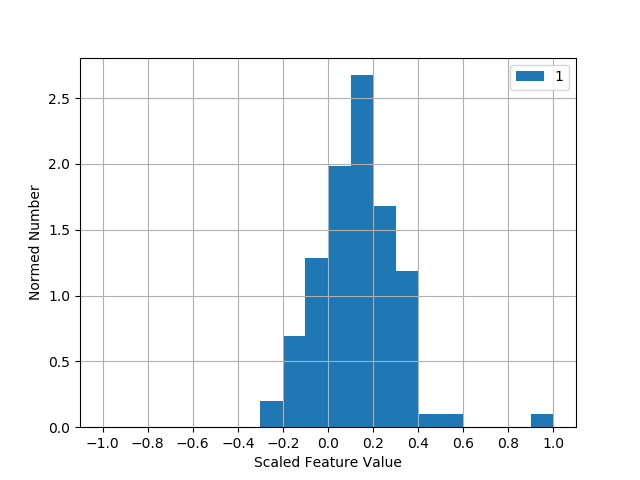

In [30]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

7 Сем. роль: деструктив


<IPython.core.display.Javascript object>


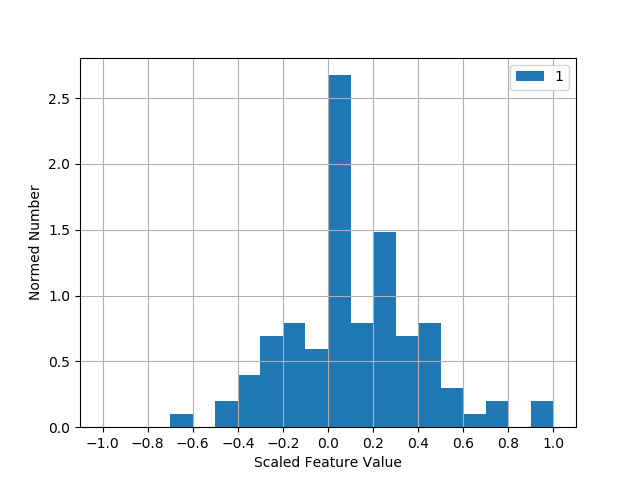

In [31]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

8 Сем. роль: каузатив


<IPython.core.display.Javascript object>


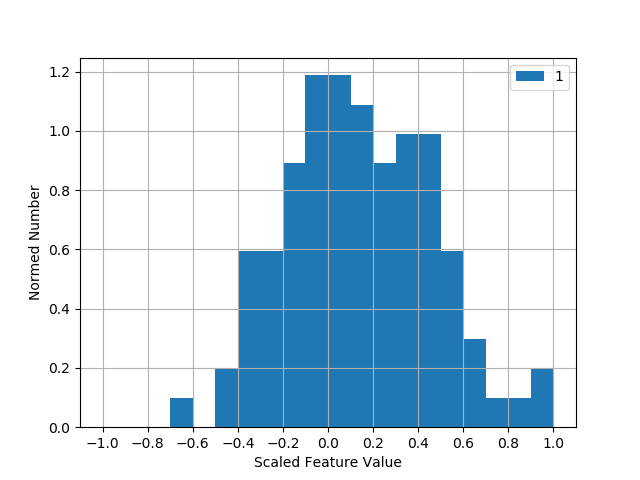

In [32]:
import numpy
import matplotlib.pylab as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

# 3. Clusters Number

In [33]:
import numpy as np
def smooth_signum(delta, eps = 0.05):
    return np.where(abs(delta)<=eps, 0, 1*np.sign(delta))

In [451]:
def myscaler(X):
    M = X.max(axis= 0)
    m = X.min(axis= 0)
    M = np.where(M>0, M, 1)
    m = np.where(m < 0, -m, 1)
    X = np.where(X>0, X/M, X/m)
    return X

In [34]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm[keys].values, frust[keys].values
from sklearn.preprocessing import scale, MaxAbsScaler
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta)

In [35]:
# Score Function
def d(x):
    return np.linalg.norm(x, 2)/x.shape[0]
def bcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    c_X = X.mean(axis = 0)
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += d(c_i - c_X)*X_i.shape[0]
    return s/(len(classes)*np.sqrt(X_i.shape[0]))
def wcd(X, y):
    classes = [i for i in range(min(y), max(y)+1)]
    s = 0
    for y_ in classes:
        X_i = np.array([i for ind, i in enumerate(X) if y[ind]==y_])
        c_i = X_i.mean(axis=0)
        s += sum([d(i-c_i) for i in X_i])/X_i.shape[0]
    return s
def balance(y):
    classes = [i for i in range(min(y), max(y)+1)]
    sizes = [len([j for j in y if j==i]) for i in classes]
    return min(min(sizes) / 10, 1)
def SF(X,y):
    alpha = 0.1
    return (1 - 1/np.exp(np.exp(bcd(X,y) - wcd(X,y)))) * balance(y)

In [36]:
from sklearn.decomposition import PCA
res = dict()
gen = range(1, 6)
init = 100
D = 10
delta_ = PCA(D).fit_transform(delta)

In [37]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
res_y  = list()
for i in gen:
    y = KMeans(n_clusters=i, n_init = init).fit_predict(delta_)
    res_y.append(y)

In [38]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['KMeans'] = cur_res

In [39]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'tied'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [40]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'diag'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [42]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [43]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
res_y  = list()
CT = 'spherical'
for i in gen:
    y = GaussianMixture(n_components=i, n_init = init, covariance_type = CT).fit_predict(delta_)
    res_y.append(y)

In [44]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['Gauss_'+CT] = cur_res

In [45]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
res_y  = list()
dist = 'euclidean'
for i in gen:
    y = AgglomerativeClustering(n_clusters=i, affinity = dist).fit_predict(delta_)
    res_y.append(y)

In [46]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['AgglomerativeClustering_' + dist] = cur_res

In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
res_y  = list()
dist = 'l1'
for i in gen:
    y = AgglomerativeClustering(n_clusters=i, affinity = dist, linkage = 'complete').fit_predict(delta_)
    res_y.append(y)

In [48]:
cur_res =  list()
for y in res_y:
    cur_res.append(SF(delta_, y))
res['AgglomerativeClustering_' + dist] = cur_res

<IPython.core.display.Javascript object>


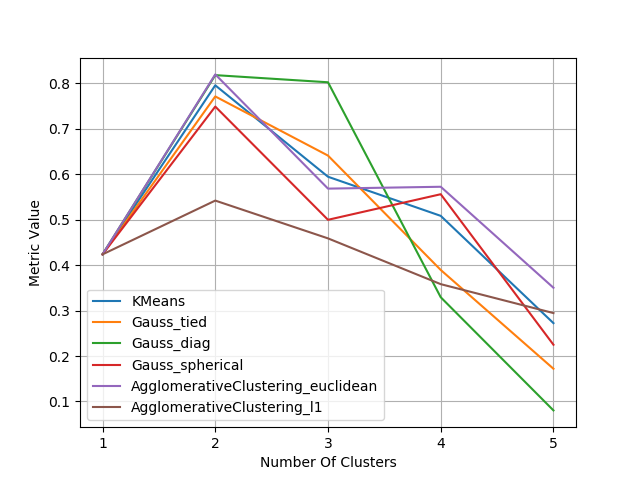

In [49]:
import matplotlib.pylab as plt
%matplotlib notebook
keys = res.keys()
for key in keys:
    plt.plot([i for i in gen], res[key])
plt.grid()
plt.legend(keys, loc='lower left')
plt.xlabel('Number Of Clusters')
plt.ylabel('Metric Value')
plt.xticks([i for i in gen])
plt.savefig('Images/clusters_number.pdf')

# 3. Many Clusters

In [50]:
import pandas as pd
import numpy as np
calm = pd.read_csv('calm.csv', ';').sort_values(by = ['ID'])
frust = pd.read_csv('frustration.csv', ';').sort_values(by = ['ID'])
keys = ['ID']
for i in keys:
    del calm[i], frust[i]
keys = calm.columns
calm, frust = calm.values, frust.values
delta = (frust-calm)
scaled_delta = myscaler(delta)
delta = smooth_signum(scaled_delta)

In [51]:
folder_results = "ManyClusters/"

## Clustering

0.7957578126836649
0 53
1 48


<IPython.core.display.Javascript object>


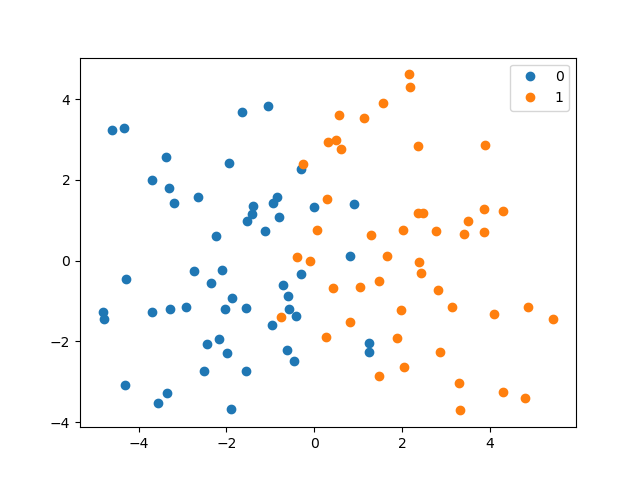

In [69]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

delta_ = PCA(10).fit_transform(delta)
y = KMeans(n_clusters=2, n_init = 10000).fit_predict(PCA(10).fit_transform(delta))
print(SF(delta_, y))
import matplotlib.pylab as plt
%matplotlib notebook
delta_ = PCA(2).fit_transform(delta)
classes = [i for i in range(min(y), max(y)+1)]
D = list()
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    print(y_, len(delta_1))
for y_ in classes:
    delta_1 = delta_[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]].mean(axis = 0))
    plt.plot(delta_1[:,0], delta_1[:,1], 'o')
plt.legend(classes)
plt.savefig('Images/' + folder_results +'Cluster.pdf')

## The Most Different Features

<IPython.core.display.Javascript object>


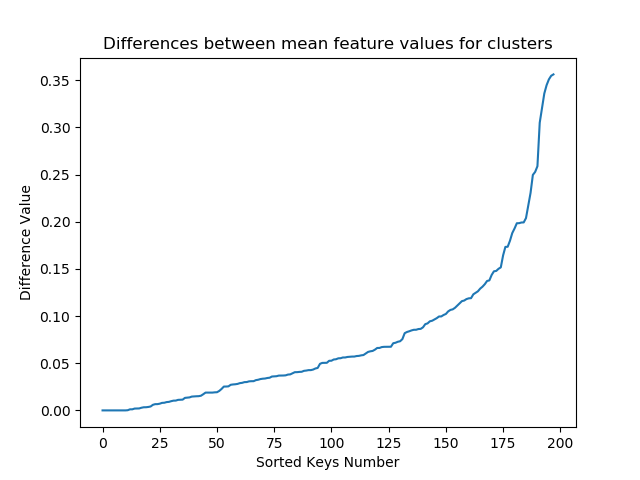

Text(0, 0.5, 'Difference Value')

In [70]:
def get_max(D):
    res = list()
    for i in D:
        for j in D:
            res.append(np.absolute(i-j))
    res = np.array(res)
    return res.max(axis = 0)
cluster_delta = get_max(D)
cluster_delta = [(i, ind) for ind, i in enumerate(cluster_delta)]
cluster_delta.sort(key = lambda x: x[0])
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot([i for i in range(len(keys))], [i[0] for i in cluster_delta])
plt.title('Differences between mean feature values for clusters')
plt.xlabel('Sorted Keys Number')
plt.ylabel('Difference Value')

In [75]:
m = 0.5*max([i[0] for i in cluster_delta])
main_keys = [i for i in cluster_delta if i[0] > m]
ind = 0
print('Number of Main Keys',len(main_keys))
for ind in main_keys:
    print(keys[ind[1]], D[0][ind[1]], D[1][ind[1]])
main_keys = [i[1] for i in main_keys]

Number of Main Keys 20
Словарь: Канцеляризмы 0.14265906933429337 -0.03715597661542867
Средняя длина слов (в количестве символов) 0.02847044023261843 -0.159476927166227
Часть речи: существительное -0.04378814278155982 -0.2366164949636416
Доля глаголов 1 лица -0.1203638663826384 0.07802225573090925
Часть речи: предлог 0.01439181441358881 -0.18407242162271154
Доля местоимений 2 лица -0.029147260728161282 0.17002027923738114
Доля глаголов 2 лица 0.046919283848350056 0.24618408975131192
Словарь: Лексика мотивации, деятельности и напряжения -0.022799531821874035 0.18104292047366524
Часть речи: местоимение-существительное 0.012009098194230352 0.22936130652009892
Доля местоимений 1 лица ед. числа -0.20415418416210232 0.02644955860551022
Доля глаголов прошедшего времени, первого лица, единственного числа -0.14161323595102532 0.10799927340152522
Словарь: Отрицательные стеничные эмоции 0.026843164846315572 0.2796291437359752
Сем. роль: предикат 0.07234304042208406 -0.18648408715519812
Причастия +

In [76]:
for i in cluster_delta[-1::-1]:
    print(keys[i[1]], i[0])

Число знаков пунктуации / Число слов 0.35615572186053224
Коэффициент опредмеченности действия (кол. глаголов / кол. существительных) 0.3546864144261259
Коэффициент логической связности 0.3508570971739171
Средняя длина предложения (в количестве слов) 0.3447099179625325
Часть речи: глагол 0.33590219235672064
Коэффициент Трейгера 0.3206662249785787
Причастия + деепричастия / Число предложений 0.30493511704281695
Сем. роль: предикат 0.2588271275772822
Словарь: Отрицательные стеничные эмоции 0.25278597888965965
Доля глаголов прошедшего времени, первого лица, единственного числа 0.24961250935255053
Доля местоимений 1 лица ед. числа 0.23060374276761253
Часть речи: местоимение-существительное 0.21735220832586857
Словарь: Лексика мотивации, деятельности и напряжения 0.20384245229553927
Доля глаголов 2 лица 0.19926480590296186
Доля местоимений 2 лица 0.19916753996554243
Часть речи: предлог 0.19846423603630034
Доля глаголов 1 лица 0.19838612211354764
Часть речи: существительное 0.1928283521820817

In [77]:
def f(delta_, delta, n = 11):
    M, m = delta.max(axis = 0), delta.min(axis = 0)
    res = dict()
    for i in range(delta_.shape[1]):
        x = np.linspace(-1, 1, n)
        res[i] = (delta_[:, i], x)
    return res
D = list()
for y_ in classes:
    delta_1 = scaled_delta[[ind for ind,i in enumerate(delta_) if y[ind]==y_]]
    D.append(f(delta_1, frust-calm))
ind = 0

0 Словарь: Канцеляризмы


<IPython.core.display.Javascript object>


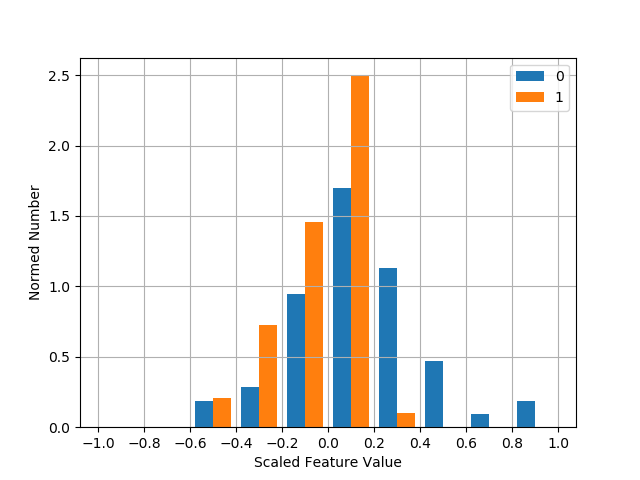

In [78]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

1 Средняя длина слов (в количестве символов)


<IPython.core.display.Javascript object>


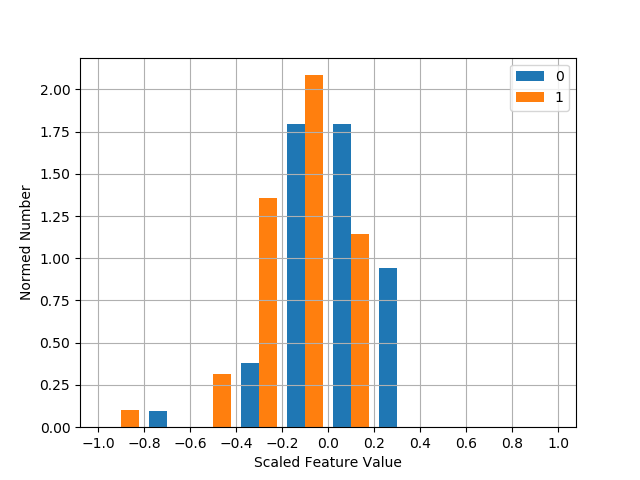

In [79]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

2 Часть речи: существительное


<IPython.core.display.Javascript object>


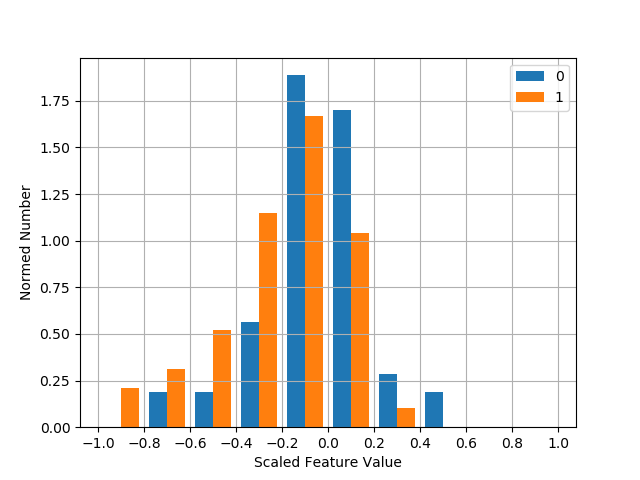

In [80]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

3 Доля глаголов 1 лица


<IPython.core.display.Javascript object>


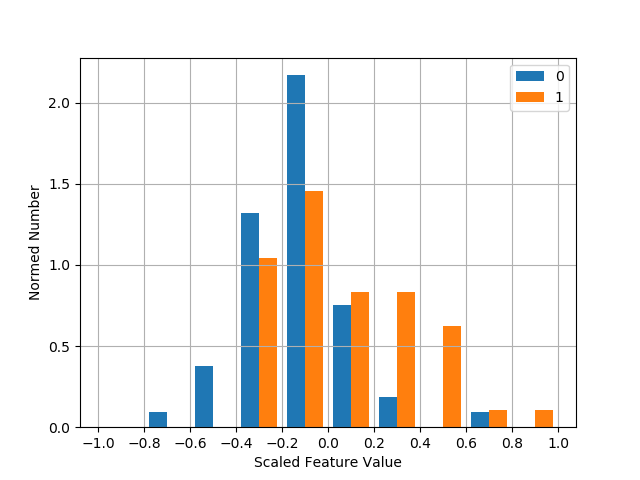

In [81]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

4 Часть речи: предлог


<IPython.core.display.Javascript object>


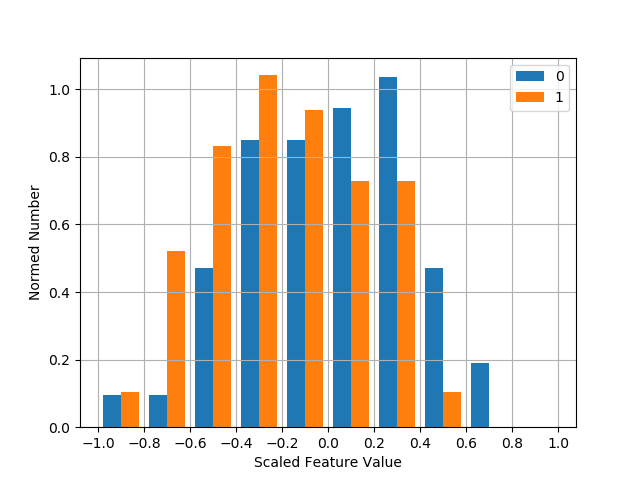

In [82]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

5 Доля местоимений 2 лица


<IPython.core.display.Javascript object>


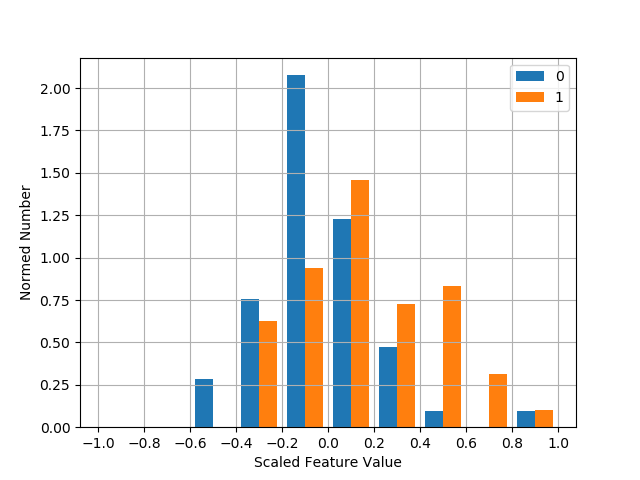

In [83]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

6 Доля глаголов 2 лица


<IPython.core.display.Javascript object>


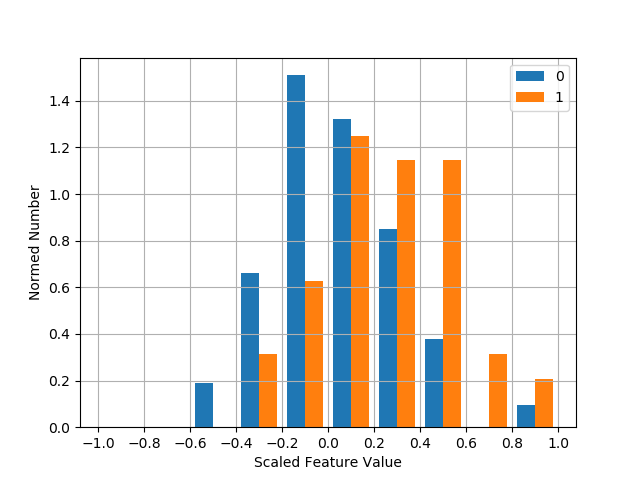

In [84]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

7 Словарь: Лексика мотивации, деятельности и напряжения


<IPython.core.display.Javascript object>


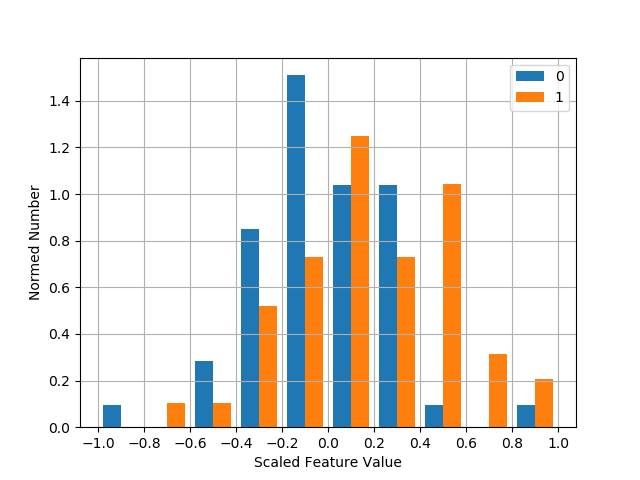

In [85]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

8 Часть речи: местоимение-существительное


<IPython.core.display.Javascript object>


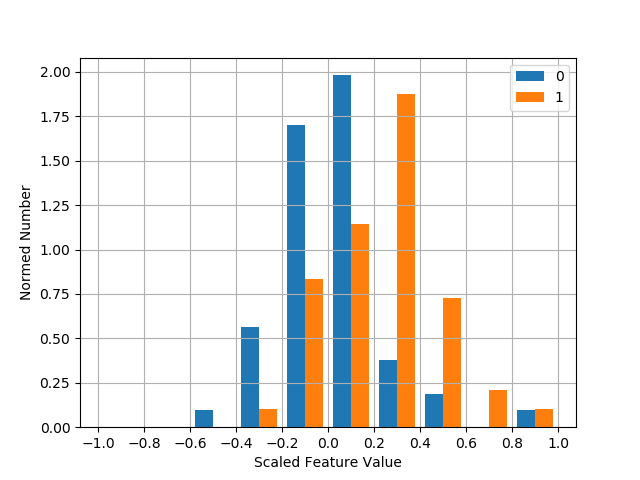

In [86]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

9 Доля местоимений 1 лица ед. числа


<IPython.core.display.Javascript object>


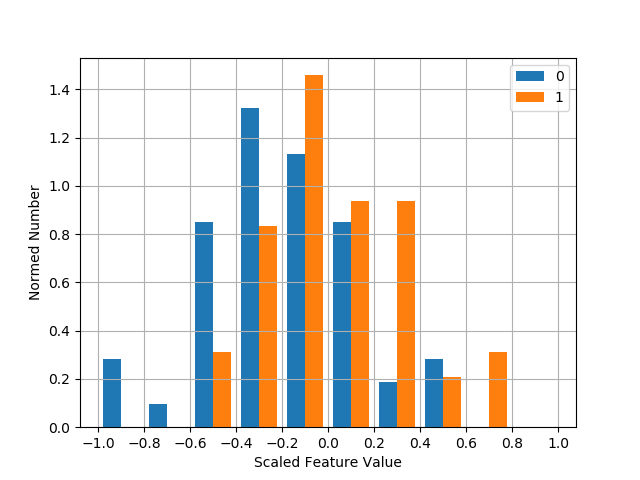

In [87]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

10 Доля глаголов прошедшего времени, первого лица, единственного числа


<IPython.core.display.Javascript object>


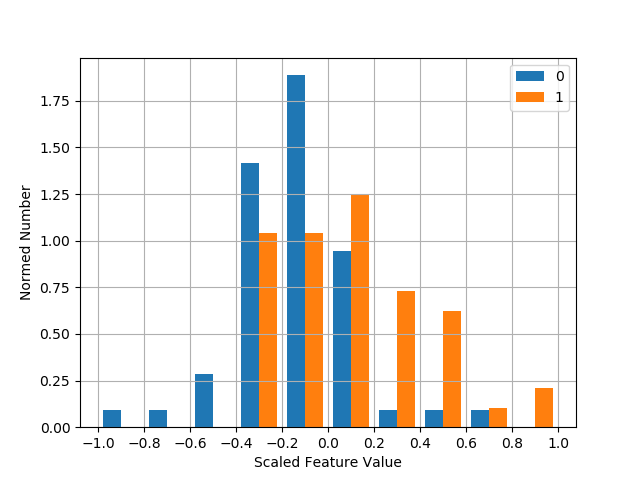

In [88]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

11 Словарь: Отрицательные стеничные эмоции


<IPython.core.display.Javascript object>


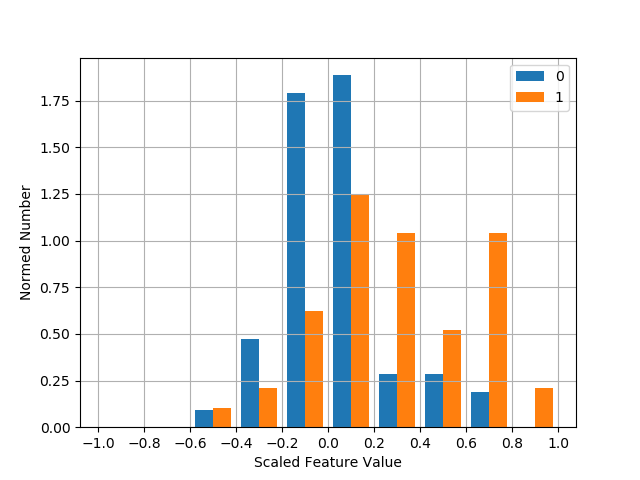

In [89]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

12 Сем. роль: предикат


<IPython.core.display.Javascript object>


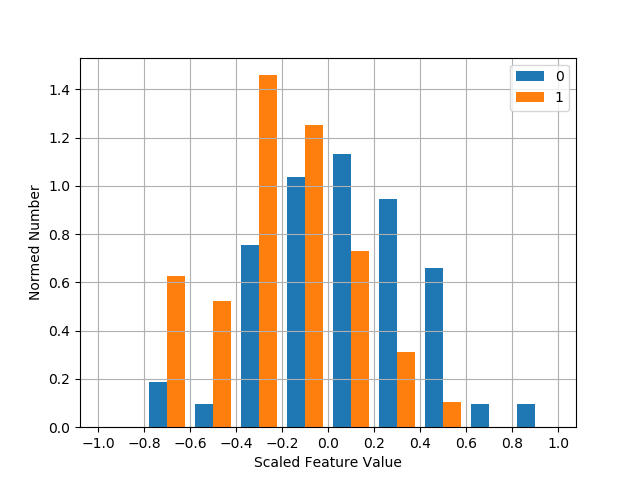

In [90]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

13 Причастия + деепричастия / Число предложений


<IPython.core.display.Javascript object>


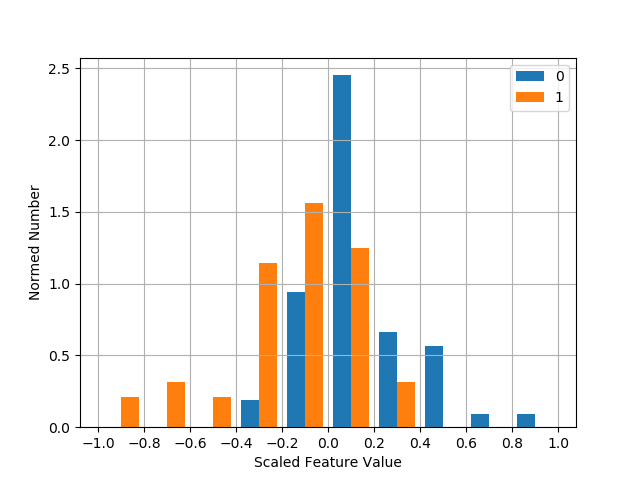

In [91]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

14 Коэффициент Трейгера


<IPython.core.display.Javascript object>


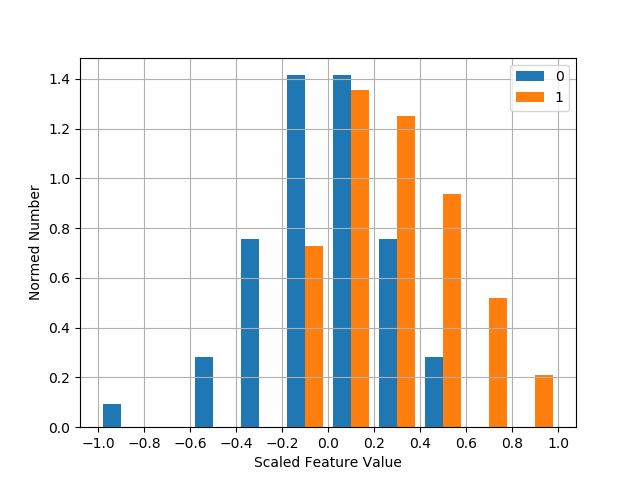

In [92]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

15 Часть речи: глагол


<IPython.core.display.Javascript object>


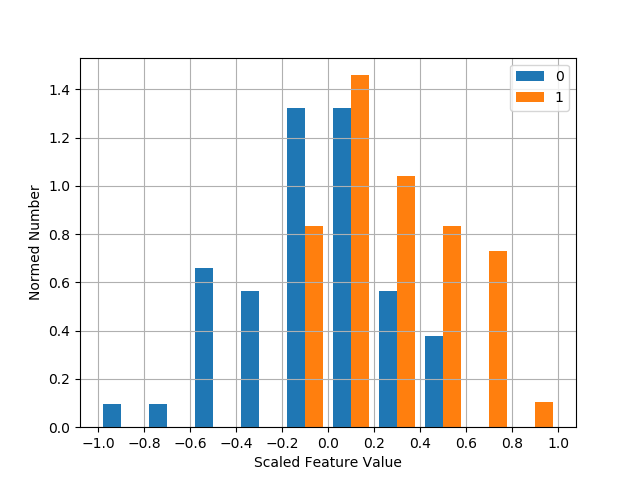

In [93]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

16 Средняя длина предложения (в количестве слов)


<IPython.core.display.Javascript object>


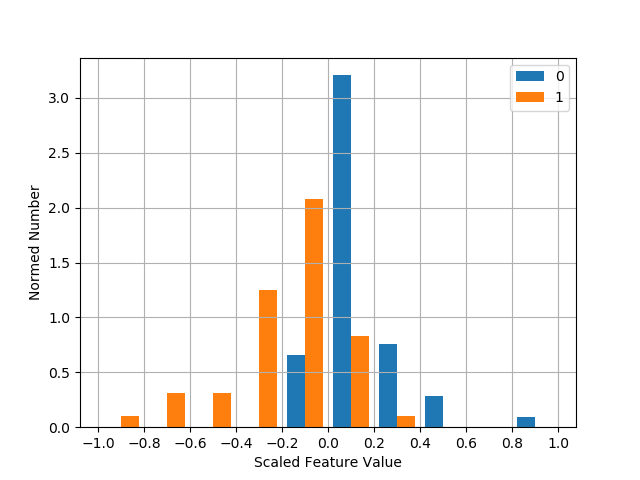

In [94]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

17 Коэффициент логической связности


<IPython.core.display.Javascript object>


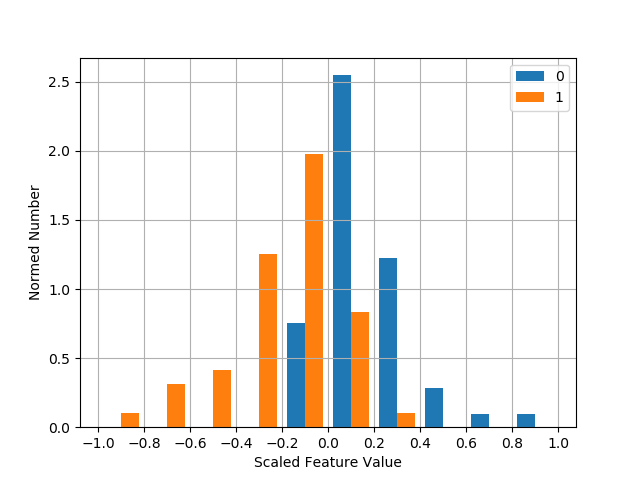

In [95]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

18 Коэффициент опредмеченности действия (кол. глаголов / кол. существительных)


<IPython.core.display.Javascript object>


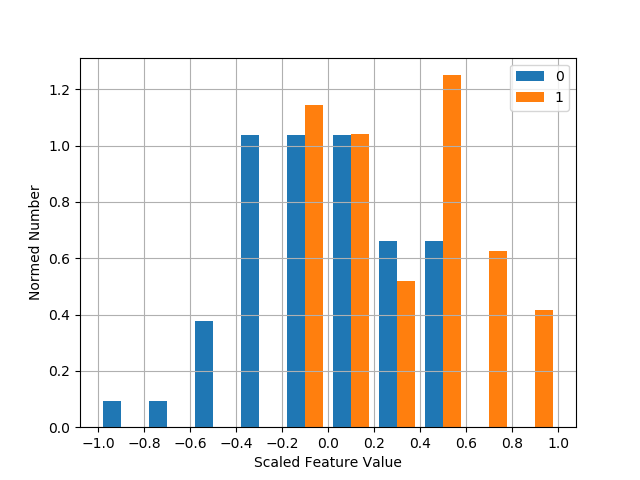

In [96]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')

19 Число знаков пунктуации / Число слов


<IPython.core.display.Javascript object>


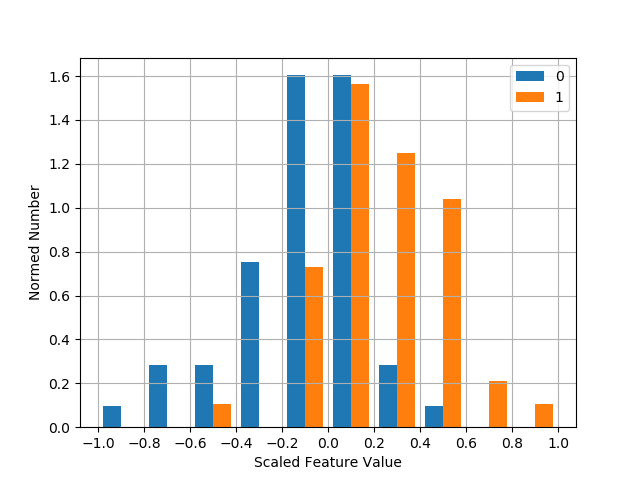

In [97]:
import numpy
from matplotlib import pyplot as plt
%matplotlib notebook
print(ind, keys[main_keys[ind]])
plt.hist([i[main_keys[ind]][0] for i in D],
         D[0][main_keys[ind]][1], 
         label=classes, 
         density = True)
plt.xticks(np.linspace(-1,1, 11))
plt.grid()
plt.xlabel('Scaled Feature Value')
plt.ylabel('Normed Number')
plt.legend(loc='upper right')
plt.show()
ind+= 1
plt.savefig('Images/' + folder_results +str(ind) + '.pdf')